In [1]:
import pygmt
import pandas as pd
import numpy as np

In [2]:
final_coef = '../ModelCase_soil_temp_lake_scalar_coef_final.txt'
uu=pd.read_csv(final_coef, sep=',')
df_uu = pd.DataFrame(uu)
print(df_uu.head(5))

   stan      lon     lat    elev  \tFitting_results  stnm         A         B  \
0   BGU -113.030  40.921  1640.0  \tFitting_results   BGU  0.015588 -0.000006   
1  BRPU -110.740  39.473  1687.0  \tFitting_results  BRPU  0.031456 -0.075704   
2  BSUT -110.761  40.536  3211.0  \tFitting_results  BSUT  0.047884 -0.066937   
3   CTU -111.750  40.693  1731.0  \tFitting_results   CTU -0.159845 -0.407661   
4  CVRU -111.172  38.918  1912.0  \tFitting_results  CVRU -0.023998 -0.230746   

          C     tshift         D      wshift      logf  nsteps  nwlker  
0  0.240047  89.998538 -0.239669  108.573019 -2.432671   12000      32  
1  0.000013  66.678746 -0.033625   96.664892 -1.557964   12000      32  
2  0.407976  89.998091 -0.114843   55.245912 -1.356543   12000      32  
3  0.379929  84.315585 -0.294768   16.782790 -1.792130   12000      32  
4  0.103922  64.710298 -0.040944  181.918417 -1.954666   12000      32  


In [3]:
coefB = df_uu['B']
coefD = df_uu['D']
ratio_b = coefB/(abs(coefB) + abs(coefD)) *100
ratio_d = coefD/(abs(coefB) + abs(coefD)) *100
df_uu['ratio_B'] = ratio_b
df_uu['ratio_D'] = ratio_d
print(ratio_b)
print(ratio_d)

0      -0.002503
1     -69.244208
2     -36.823083
3     -58.035901
4     -84.929883
5     -79.955303
6     -50.519079
7     -32.643643
8      -0.117376
9      -0.003190
10    -30.821501
11    -99.998125
12     -0.024782
13     -0.008905
14     -1.624355
15     -0.022599
16    -89.682540
17     -0.015658
18     -0.029877
19   -100.000000
20    -99.982745
21    -23.909970
22    -38.095479
23    -54.774339
24    -35.804445
25    -26.069055
26    -60.236250
27    -30.493164
28     -0.017177
29     -0.209318
dtype: float64
0    -99.997497
1    -30.755792
2    -63.176917
3    -41.964099
4    -15.070117
5    -20.044697
6    -49.480921
7    -67.356357
8    -99.882624
9    -99.996810
10   -69.178499
11    -0.001875
12   -99.975218
13   -99.991095
14   -98.375645
15   -99.977401
16   -10.317460
17   -99.984342
18   -99.970123
19    -0.000000
20    -0.017255
21   -76.090030
22   -61.904521
23   -45.225661
24   -64.195555
25   -73.930945
26   -39.763750
27   -69.506836
28   -99.982823
29   -99.79

grdimage [WARNING]: Cannot derive intensities from an input image file; -I ignored


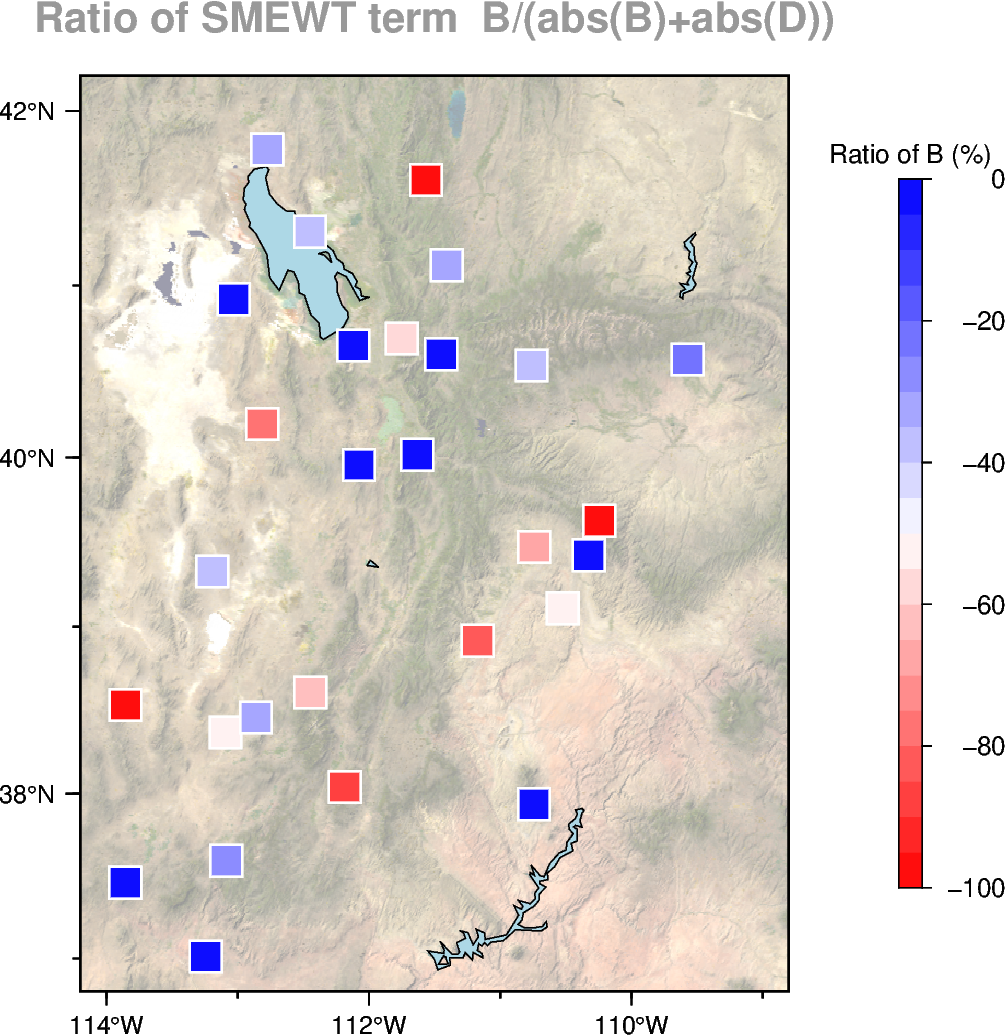

In [4]:
# create df with station information
region=[-114.2,-108.8,36.8,42.2]
proj="M6c"

# --- Rsoil
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="10p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(projection=proj, grid='@earth_day_30s',shading=True,transparency=60,frame=["af", "+tRatio of SMEWT term  B/(abs(B)+abs(D))"])
fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)

pygmt.makecpt(cmap='polar',  series=[-100,0,5], reverse=True)
# seismic stations
fig.plot(x = df_uu.lon, y = df_uu.lat, fill=ratio_b, cmap=True , style = "s0.15i", pen = "0.5p,255")
#fig.text(text="Ratio of soil term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='10p', MAP_ANNOT_OFFSET="6p",)
fig.colorbar( cmap=True,    position="JRM+w6c/0.2c",     frame=["a", "y+lRatio of B (%)"],)


fig.show()


grdimage [WARNING]: Cannot derive intensities from an input image file; -I ignored


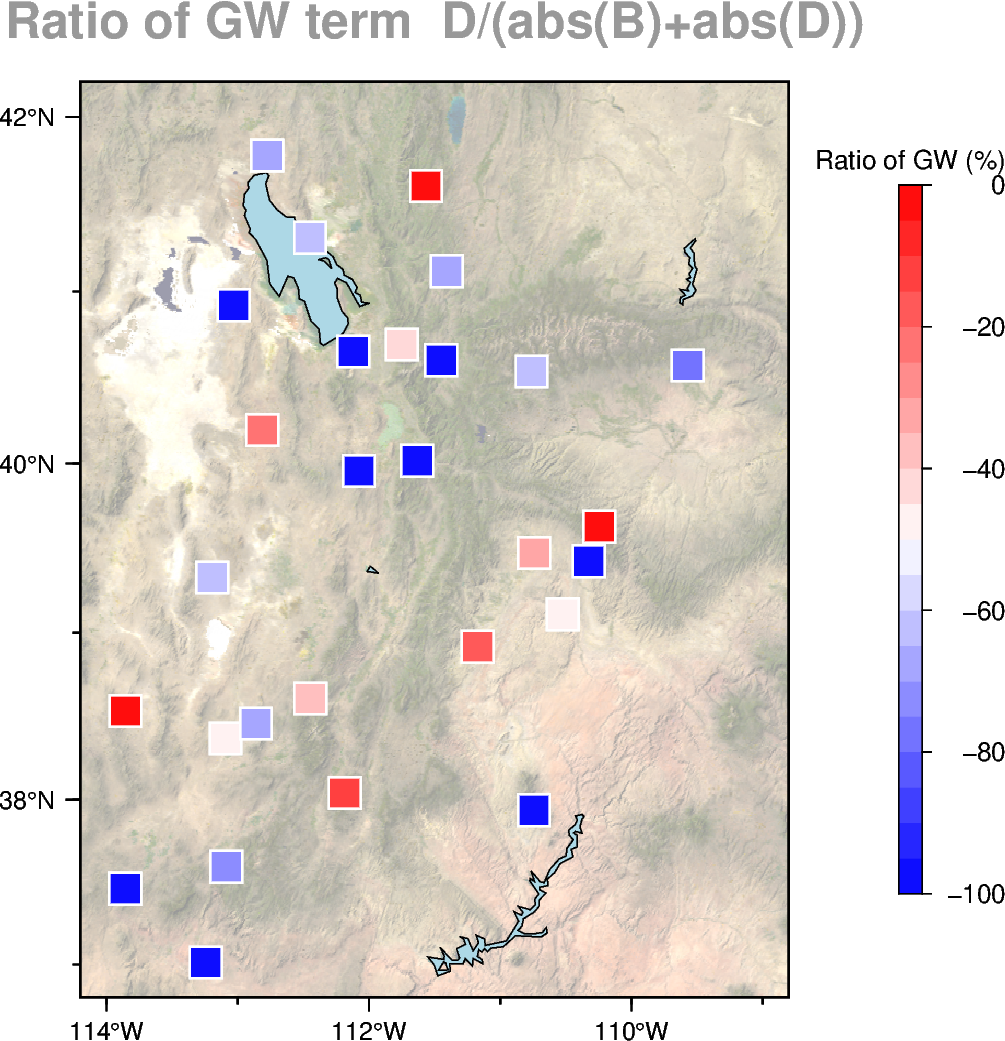

In [5]:


fig.shift_origin(xshift="8c")
# --- Rtemp
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="12p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(projection=proj, grid='@earth_day_30s',shading=True,transparency=60,frame=["af", "+tRatio of GW term  D/(abs(B)+abs(D))"])

fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)


pygmt.makecpt(cmap='polar',  series=[-100,0,5])
# seismic stations
fig.plot(x = df_uu.lon, y = df_uu.lat, fill=ratio_d, cmap=True, style = "s0.15i", pen = "0.5p,255")
#fig.text(text="Ratio of temp term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='10p', MAP_ANNOT_OFFSET="6p",)

fig.colorbar( cmap=True,    position="JRM+w6c/0.2c",     frame=["a", "y+lRatio of GW (%)"],)

fig.show()


grdimage [WARNING]: Cannot derive intensities from an input image file; -I ignored


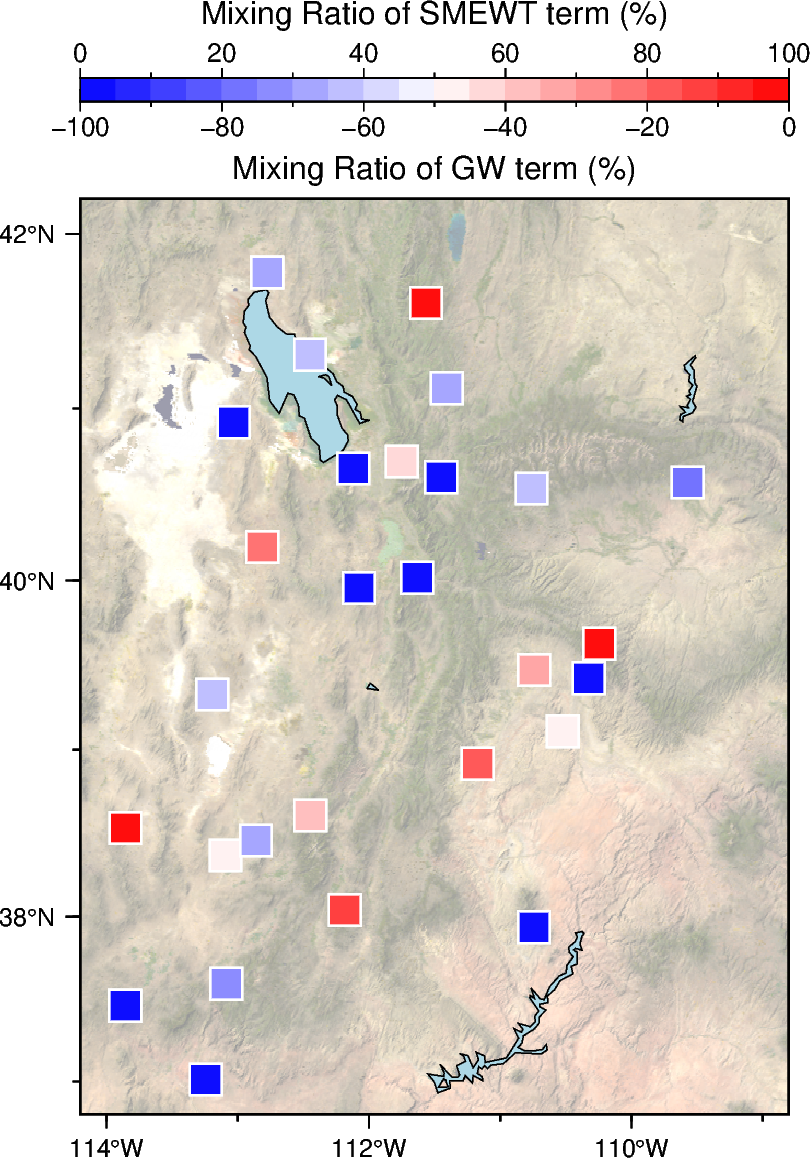

In [6]:

# --- Rtemp
fig = pygmt.Figure()
pygmt.config(MAP_GRID_PEN = '0.1p,gray' , MAP_FRAME_PEN='0.5p', MAP_FRAME_TYPE="plain", MAP_TITLE_OFFSET="0.2p", FONT_TITLE="12p", FONT_ANNOT='6p',  )

grid = pygmt.datasets.load_earth_relief(resolution="30s", region=region)
fig.grdimage(projection=proj, grid='@earth_day_30s', shading=True, transparency=60,frame=["af",])

fig.coast(region=region, projection=proj, frame="af",lakes=True,rivers="0/1p,blue,solid",
          borders="1/1p,black", water="lightblue",shorelines=True,)


pygmt.makecpt(cmap='polar',  series=[-100,0,5])
# seismic stations
fig.plot(x = df_uu.lon, y = df_uu.lat, fill=ratio_d, cmap=True, style = "s0.15i", pen = "0.5p,255")
#fig.text(text="Ratio of temp term", x=-110,y=42, font="8p,Helvetica-Bold")
pygmt.config( FONT_ANNOT='10p',)

fig.shift_origin(yshift="9.5c")
fig.colorbar( cmap=True,    position="JBC+w6c/0.1c+h",     frame=["a20f10+lMixing Ratio of GW term (%)"],)

fig.shift_origin(yshift="-9.5c")
#fig.shift_origin(xshift="w1.8c")
pygmt.makecpt(cmap='polar',  series=[-100,0,5], reverse=True)
fig.colorbar( cmap=False,   position="JTC+w6c/0.2c+h",  frame=["a20f10+lMixing Ratio of SMEWT term (%)"], scale=-1 )

fig.show()
figname="RatioBD.png"
fig.savefig(figname, dpi=300)